<a href="https://colab.research.google.com/github/Prerna0025/Diffusion-model-with-GNN/blob/main/graph_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00


In [22]:
from torch_geometric.datasets import Planetoid

citeseer_dataset = Planetoid(root='/tmp/CiteSeer', name='CiteSeer')

data=citeseer_dataset[0]

print(f"Dataset: {citeseer_dataset}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of Edges: {data.num_edges}")
print(f"Number of features: {data.num_node_features}")
print(f"Number of classes: {citeseer_dataset.num_classes}")


Dataset: CiteSeer()
Number of nodes: 3327
Number of Edges: 9104
Number of features: 3703
Number of classes: 6


TypeError: 'int' object is not iterable

In [13]:
print(data)

print(f"Node feature shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")
print(f"Labels shape: {data.y.shape}")

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Node feature shape: torch.Size([3327, 3703])
Edge index shape: torch.Size([2, 9104])
Labels shape: torch.Size([3327])


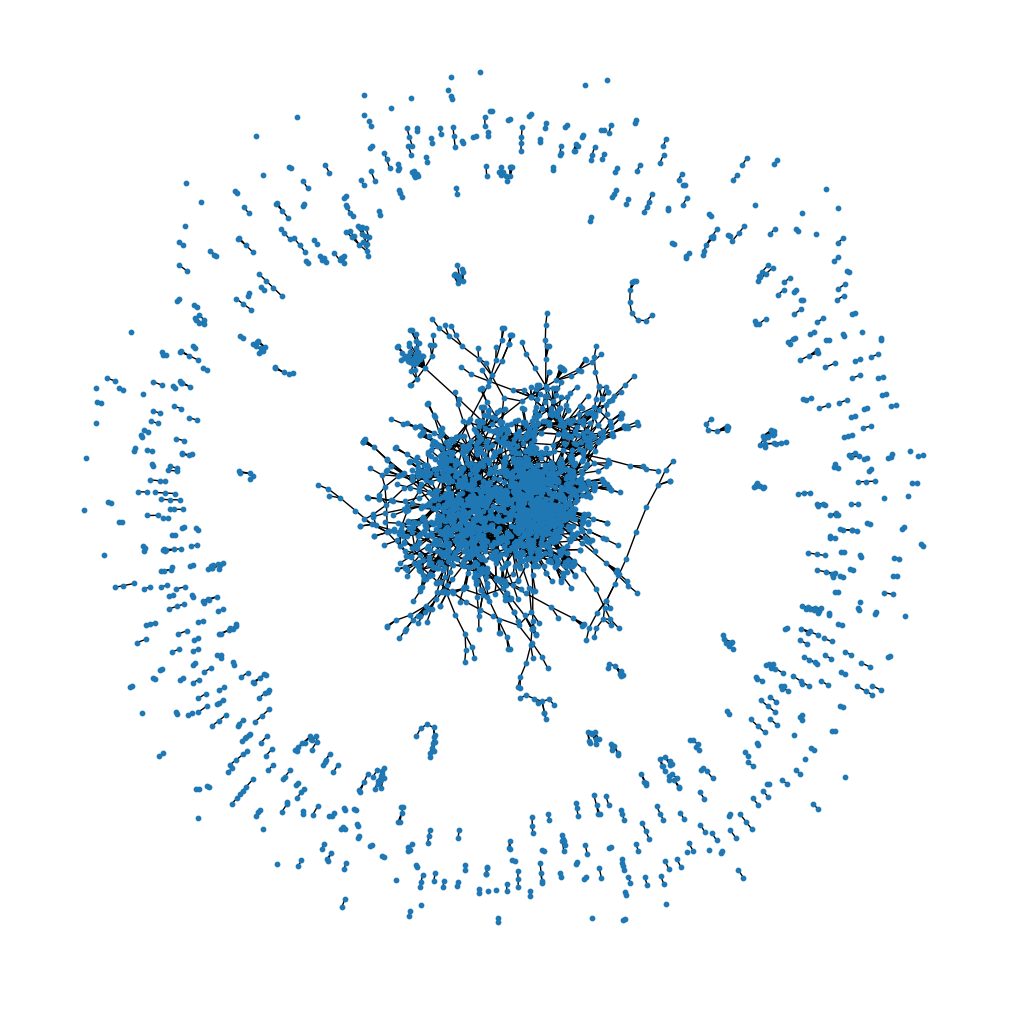

In [20]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

graph = to_networkx(data, to_undirected=True)
plt.figure(figsize=(10,10))
nx.draw(graph,node_size=10,with_labels=False)
plt.show()

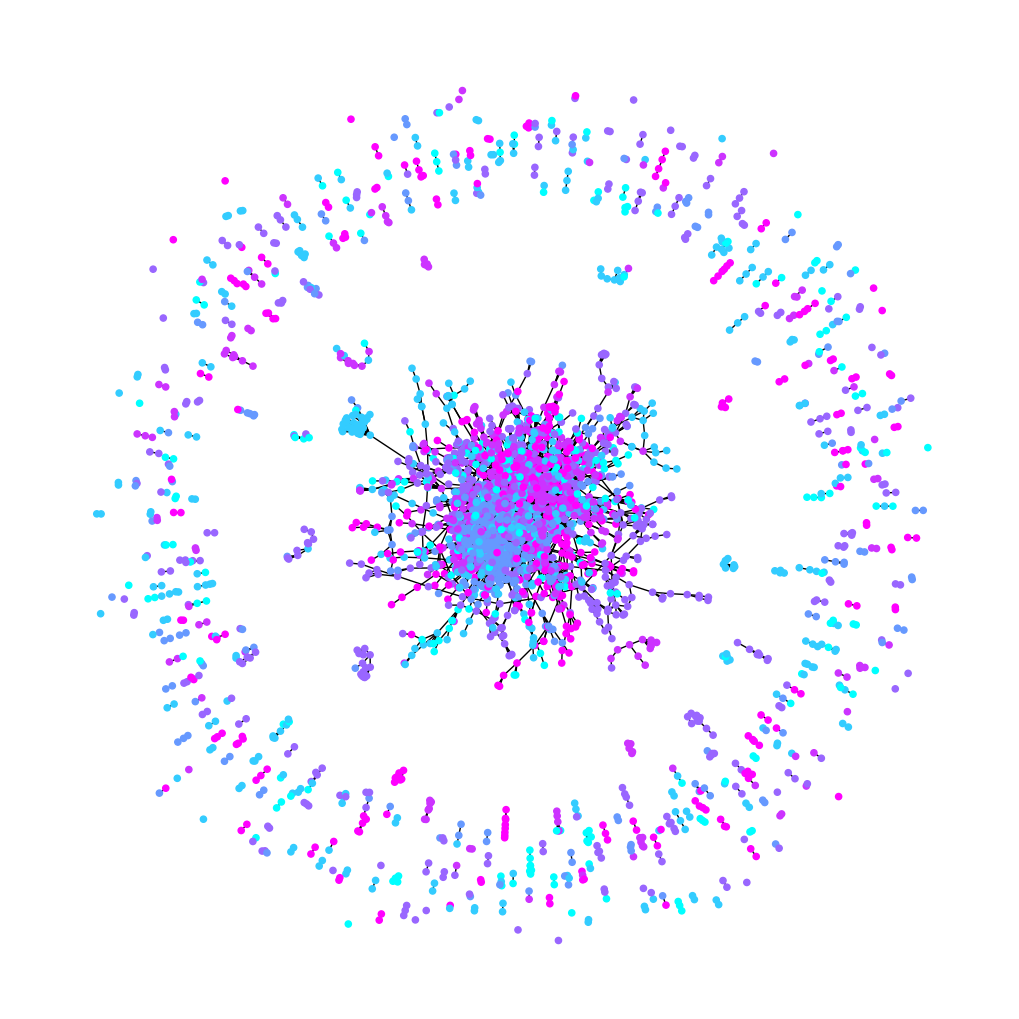

In [21]:
plt.figure(figsize=(10,10))
nx.draw(
    graph,
    node_color=data.y,
    cmap='cool',
    node_size=20,
    with_labels = False
)
plt.show()

In [27]:
from collections import Counter
classes = data.y.unique()
print(f"List of classes: {classes}")

class_counts = Counter(data.y.tolist())
for cls,count in class_counts.items():
  print(f"Class: {cls} ---> {count} nodes")



List of classes: tensor([0, 1, 2, 3, 4, 5])
Class: 3 ---> 701 nodes
Class: 1 ---> 590 nodes
Class: 5 ---> 508 nodes
Class: 0 ---> 264 nodes
Class: 2 ---> 668 nodes
Class: 4 ---> 596 nodes
